# Torch Ops
Let's get accustomed to one of the most popular frameworks in modern deep learning

In [ ]:
!pip install torch

In [ ]:
import torch

In [ ]:
# Torch is quite similar to numpy. It has almost all the functions which are defined in numpy and arguments/usage is quite similar as well.
# Create your first torch tensor
a = torch.tensor([1, 2, 3])

In [ ]:
# We can do multiplication/add/subtraction/divison and other pointwise operations without writing loops(just like in numpy)
print(a * 2)
print(a + 2)
print(a / 2)
print(a - 10)

tensor([2, 4, 6])
tensor([3, 4, 5])
tensor([0.5000, 1.0000, 1.5000])
tensor([-9, -8, -7])


In [ ]:
# Just like in numpy we can get info about the shape of tensor
print(a.shape)

torch.Size([3])


In [ ]:
# inplace operations
a.add_(5)
a.sub_(5)

tensor([1, 2, 3])

In [ ]:
# Just like in numpy tensors can be indexed/sliced
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
print(a.shape)

torch.Size([2, 3])


In [ ]:
a.numel()

6

In [ ]:
# Indexing tensor
print(a[0, :].shape)

torch.Size([3])


In [ ]:
# Keep the first dimension
print(a[[0, 1], :].shape)

torch.Size([2, 3])


In [ ]:
# indexing multiple dimensions
print(a[:, [0, 1]].shape)

torch.Size([2, 2])


In [ ]:
# As in python, torch also supports indexing from the end
print(a[-1, :])

tensor([4, 5, 6])
tensor([4, 5, 6])


In [ ]:
# More indexing ops
print(a[0, 1:])
print(a[0, :2])

tensor([2, 3])
tensor([1, 2])


In [ ]:
# Broadcasting in torch is the same as in numpy
a = torch.rand((10, 5, 3))
b = torch.rand((1, 5, 1))
(a + b).shape

torch.Size([10, 5, 3])

In [ ]:
# We can also do reshapes!
b = torch.rand((10, 5, 3, 2))
print(b.shape)

torch.Size([10, 5, 3, 2])


In [ ]:
b.shape

torch.Size([10, 5, 3, 2])

In [ ]:
# Multiplication of shape values should be the same when reshaping
# If we have a shape of (A, B, C, D), shape value mult. is A * B * C * D
# We can't get a shape of (A, B, C) with reshaping(unless D is 1)
b.reshape((10, 5, 6)).shape

torch.Size([10, 5, 6])

In [ ]:
c = torch.rand((10, 5, 3, 1, 1, 1, 1, 1, 1, 1))
c.shape
c.reshape((10, 5, 3)).shape

torch.Size([10, 5, 3])

In [ ]:
# -1 reshaping operation
d = torch.rand((10, 5, 3, 6, 100, 4))
d.shape
d.reshape(10, 5, -1).shape

torch.Size([10, 5, 7200])

In [ ]:
# NOTE when reshaping!
print(b.view(-1).shape) # does not copy the values, use this when possible
print(b.reshape(-1).shape) # copies the values

In [ ]:
# Converting tensors to numpy
a_np = a.numpy()
a_list = a.tolist()

# Building Neural Network on Tabular Dataset(Pytorch way)

After going through basic torch tensor operations, now we can learn how to build neural networks in torch. Initially we will start with building network on tabular dataset to see how easy it can be to build a network with just a few lines of model definition and training script

In [ ]:
# Most of the packages are installed but still to not get errors later
!pip install pandas scikit-learn torch kaggle

In [ ]:
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt # For plotting learning curves

In [ ]:
data = fetch_california_housing()
print(data.feature_names)

X, y = data.data, data.target

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
X.shape

(20640, 8)

In [ ]:
# Define the model
def build_model():
  model = nn.Sequential(
      nn.Linear(in_features=8, out_features=24),
      nn.ReLU(),
      nn.Linear(in_features=24, out_features=12),
      nn.ReLU(),
      nn.Linear(in_features=12, out_features=6),
      nn.ReLU(),
      nn.Linear(6, 1),
  )
  return model

In [ ]:
model = build_model()
# Pytorch models have 2 states:
model = model.train() # Used when we need to train the network which enables gradient tracking(for backwards operation) and collection of statistics(mean and var for batchnorm)

model = model.eval() # and model.eval() for evaluation mode, which disables gradient tracking and collection of statistics for efficiency during inference.

In [ ]:
# Saving the model and viewing it in netron app
torch.save(model, "model.pth")

In [ ]:
# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [ ]:
# If we have 1,000 observations(rows) and batch_size=10 then
# number of iterations we would have to do to run a single epoch is obs/batch_size
# 1,000/10=100, 100 iterations for a 1 epoch

In [ ]:
# training parameters
n_epochs = 30   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

In [ ]:
# If we have gpu
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
# Transform dataset and model weights to gpu if it is available
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)
model = model.to(device)

In [ ]:
model = build_model()

In [ ]:
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
# Let's try different optimizers
# optimizer = optim.SGD(model.parameters(), lr=1.0) # Huge lr
# optimizer = optim.SGD(model.parameters(), lr=0.1) # Decrease it
# optimizer = optim.SGD(model.parameters(), lr=0.01) # Decrease it even more
# optimizer = optim.SGD(model.parameters(), lr=0.0001) # Is this good enough?
# optimizer = optim.Adam(model.parameters(), lr=1.0) # Huge lr with Adam
optimizer = optim.Adam(model.parameters(), lr=0.0001)

## THERE IS AN ERROR IN THE ABOVE CODE, can you tell what it is?

In [ ]:
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history_val = []
history_train = []

# training loop
for epoch in range(n_epochs):
    model.train()
    # Ensure batch_start is correctly defined, e.g., range(0, len(X_train), batch_size)
    for start in tqdm.tqdm(range(0, len(X_train), batch_size), desc=f"Epoch {epoch}", unit="batch"):
        # take a batch
        X_batch = X_train[start:start+batch_size]
        y_batch = y_train[start:start+batch_size]
        # forward pass
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()
    # Evaluate loss on validation set at end of each epoch
    model.eval()
    # Get mse for training set(Usually you collect this in the 2nd for loop and
    # then average it out but here for simplicity we record the loss at the end of the epoch)
    y_pred_train = model(X_train)
    mse = loss_fn(y_pred_train, y_train)
    mse = float(mse)
    history_train.append(mse)
    # Get mse for validation set
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history_val.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore the best model
model.load_state_dict(best_weights)

Epoch 29: 100%|██████████| 1445/1445 [00:02<00:00, 537.20batch/s]


<All keys matched successfully>

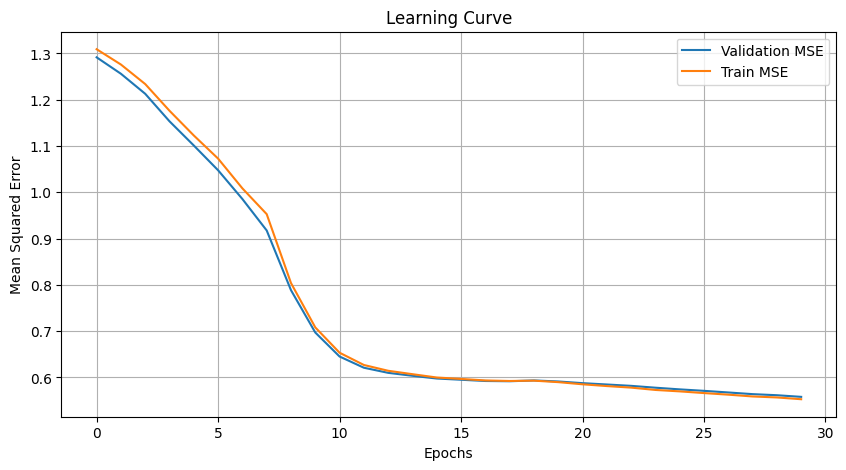

In [ ]:
# After the training loop
plt.figure(figsize=(10, 5))
plt.plot(history_val, label='Validation MSE')
plt.plot(history_train, label="Train MSE")
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Let's build the network ourselves

In [ ]:
# After uploading kaggle.json to the work folder
!mv kaggle.json /root/.kaggle/kaggle.json

In [ ]:
# General imports
import kaggle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
from torch.utils.data import DataLoader, TensorDataset
from typing import List
from torch import nn
import torch.nn.init as init
import torch
from torch import nn
from copy import deepcopy
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile

In [ ]:
# Small function for reading the csv file
def read_data(competition_name: str) -> pd.DataFrame:
    api = KaggleApi()
    api.authenticate()
    api.competition_download_files(competition_name)
    with zipfile.ZipFile(f'{competition_name}.zip', 'r') as zip_ref:
        zip_ref.extractall()
    print(f"Downloaded the Titanic dataset to ./{competition_name}")
    return pd.read_csv("train.csv")

In [ ]:
# Encoding the labels to transform categorical features to numerical ones
# since neural network doesn't take categorical features
def label_encode(dataset: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    # Convert categorical features to numerical features
    label_encoders = {}
    for column in columns:
        label_encoder = LabelEncoder()
        dataset[column] = label_encoder.fit_transform(dataset[column])
        label_encoders[column] = label_encoder
    return dataset

# Function to fix nas in titanic dataset
def fix_nas(dataset: pd.DataFrame) -> pd.DataFrame:
    # Preprocessing
    dataset.drop("Cabin", axis=1, inplace=True)
    dataset["Age"].fillna(value=dataset["Age"].median(), inplace=True)
    dataset["Embarked"].fillna(dataset["Embarked"].mode()[0], inplace=True)
    return dataset

# Putting those 2 functions together
def preprocess_data(dataset: pd.DataFrame) -> pd.DataFrame:
    dataset = fix_nas(dataset)
    dataset = label_encode(dataset, ['Sex', 'Embarked'])
    return dataset

# Scaling data to speed up convergence
def scale_data(X_train, X_test) -> pd.DataFrame:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

# Split data into train and validation set
def split_data(dataset: pd.DataFrame, feature_names: List) -> pd.DataFrame:
    X = dataset[feature_names].values
    y = dataset["Survived"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


In [ ]:
# Converting data to tensors
def convert_to_tensors(X_train, y_train, X_test, y_test):
    train_tensors = (torch.tensor(X_train, dtype=torch.float32),
                     torch.tensor(y_train, dtype=torch.float32))
    test_tensors = (torch.tensor(X_test, dtype=torch.float32),
                    torch.tensor(y_test, dtype=torch.float32))
    return *train_tensors, *test_tensors

# Preparing torch dataloader class for loading the data
def prepare_dataloader(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, batch_size):
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

In [ ]:
# Data pipeline for reading, preprocessing and preparing torch dataloaders
def data_pipeline(data_path: str, batch_size: int):
    # Selecting the valid columns (assuming 'Survived' is the label)
    features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
    data = read_data(data_path)
    data = preprocess_data(data)
    X_train, X_test, y_train, y_test = split_data(data, features)
    X_train, X_test = scale_data(X_train, X_test)
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = convert_to_tensors(X_train, y_train, X_test, y_test)
    train_loader, test_loader = prepare_dataloader(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, batch_size)
    return train_loader, test_loader


In [ ]:
# Model definition
class TitanicNN(nn.Module):
    def __init__(self):
        super(TitanicNN, self).__init__()
        self.fc1 = nn.Linear(in_features=7, out_features=32)  # 7 features as input and 32 neurons as output
        self.fc2 = nn.Linear(in_features=32, out_features=64)  # FILL IN
        self.fc3 = nn.Linear(in_features=64, out_features=64)  # FILL IN
        self.fc4 = nn.Linear(in_features=64, out_features=32)  # FILL IN
        self.fc5 = nn.Linear(in_features=32, out_features=1)  # FILL IN, FINAL ONE SHOULD RETURN A SINGLE NUMBER
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.sigmoid(x)
        return x

In [ ]:
# Model evaluation
def evaluate_model(model, validation_dataloader):
    # Evaluation on the test set
    model.eval()
    correct = 0
    with torch.no_grad():
        test_len = 0
        for data, targets in validation_dataloader:
            output = model(data).squeeze()
            predictions = output.round()  # Convert probabilities to binary predictions
            correct += (predictions == targets).sum().item()
            test_len += targets.shape[0]
    return correct / test_len

# Training script for our model
def train_model(model, train_dataloader, validation_dataloader, epochs, lr):
    # Define the loss function and optimizer
    criterion = nn.BCELoss() # Two losses for BCE(BCEWithLogitsLoss and BCELoss)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    best_accuracy = 0.0

    # Training loop
    for epoch in range(epochs):
        model.train()
        for data, targets in train_dataloader:
            optimizer.zero_grad()
            output = model(data).squeeze()  # Squeeze to remove any extra dimensions
            loss = criterion(output, targets)
            loss.backward()
            optimizer.step()
        accuracy = evaluate_model(model, validation_dataloader)
        if best_accuracy < accuracy:
            best_accuracy = accuracy
            best_model = deepcopy(model)

        print(f"Epoch {epoch+1}, Loss: {loss.item()}")
    return best_model

In [ ]:
train_dataloader, validation_dataloader = data_pipeline("titanic", batch_size=32)

Downloaded the Titanic dataset to ./titanic


In [ ]:
model = TitanicNN()

In [ ]:
trained_model = train_model(model, train_dataloader, validation_dataloader, 20, 0.0001)

Epoch 1, Loss: 0.6905242800712585
Epoch 2, Loss: 0.7008498311042786
Epoch 3, Loss: 0.6893095374107361
Epoch 4, Loss: 0.6889253854751587
Epoch 5, Loss: 0.6919716000556946
Epoch 6, Loss: 0.6903482675552368
Epoch 7, Loss: 0.6637620329856873
Epoch 8, Loss: 0.6817731857299805
Epoch 9, Loss: 0.6908969879150391
Epoch 10, Loss: 0.6412304043769836
Epoch 11, Loss: 0.6637557148933411
Epoch 12, Loss: 0.6221181750297546
Epoch 13, Loss: 0.6899707913398743
Epoch 14, Loss: 0.6388145685195923
Epoch 15, Loss: 0.7185348272323608
Epoch 16, Loss: 0.6587612628936768
Epoch 17, Loss: 0.7299695611000061
Epoch 18, Loss: 0.6048486232757568
Epoch 19, Loss: 0.6591107249259949
Epoch 20, Loss: 0.5400851964950562


In [ ]:
evaluate_model(trained_model, validation_dataloader)

0.7877094972067039